ZSIC - Zero Shot Image Classification : Leveragin OpenAI CLIP, Sentence-Transformers, HuggingFace Transformers.

In [2]:
!pip install git+https://github.com/PrithivirajDamodaran/ZSIC.git

  Cloning https://github.com/PrithivirajDamodaran/ZSIC.git to /tmp/pip-req-build-6z86zv_0
  Running command git clone --filter=blob:none --quiet https://github.com/PrithivirajDamodaran/ZSIC.git /tmp/pip-req-build-6z86zv_0
  Resolved https://github.com/PrithivirajDamodaran/ZSIC.git to commit dbd1a8b7db5a7ec7fcab168e818681aa11fd95ca
  Preparing metadata (setup.py) ... done
  Created wheel for ZSIC: filename=ZSIC-1.0-py3-none-any.whl size=4796 sha256=7e1f234f90570e84533fe319a376d5e807f1e24f0cea3aeb52cbc73f2da7e5e8
  Stored in directory: /tmp/pip-ephem-wheel-cache-vz7o64wh/wheels/fe/07/71/0ba6ffc0d57206230fbaeeb8261f17d205bf0ba159fc1e167e
Successfully built ZSIC


In [3]:
from ZSIC import ZeroShotImageClassification

zsic = ZeroShotImageClassification() # default: 'ViT-B/32', en

Loading OpenAI CLIP model ViT-B/32 ...


100%|███████████████████████████████████████| 338M/338M [00:05<00:00, 70.4MiB/s]


Label language en ...


In [9]:
image_path = "/content/CAR.jpg"

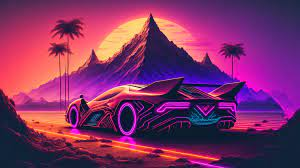

In [13]:
from IPython.display import Image, display
display(Image(image_path))


In [15]:
preds = zsic(image = image_path,
            candidate_labels = ["A Car", "A plane", "Vehicle","A Truck"],
            hypothesis_template="A photo of {}",  # Using a hypothesis_template makes the scores more robust
            )

In [17]:
preds

{'image': '/content/CAR.jpg',
 'scores': (0.63067037, 0.35102093, 0.017855832, 0.00045294425),
 'labels': ('A Car', 'Vehicle', 'A Truck', 'A plane')}

In [19]:
max(preds['scores'])

0.63067037

In [21]:
preds['scores'].index(max(preds['scores']))

0

In [22]:
preds['labels'][preds['scores'].index(max(preds['scores']))]

'A Car'

# Car Classifier

In [14]:
from PIL import Image
import glob, random
import os

In [15]:
# Get the path to the folder
folder_path = "/content/drive/MyDrive/Colab_Notebooks/GenerativeAI/Classification_Model/images"

# Get a list of all the files in the folder
filenames = os.listdir(folder_path)

# Select a random file from the list
random_filename = random.choice(filenames)

# Print the random filename
print(random_filename)

202104091184368_jpg.rf.adc972e2ef449e1ff19efd54e4934544.jpg


In [17]:
image_path = os.path.join(folder_path, random_filename)

In [18]:
image_path

'/content/drive/MyDrive/Colab_Notebooks/GenerativeAI/Classification_Model/images/202104091184368_jpg.rf.adc972e2ef449e1ff19efd54e4934544.jpg'

In [19]:
img = Image.open(image_path)

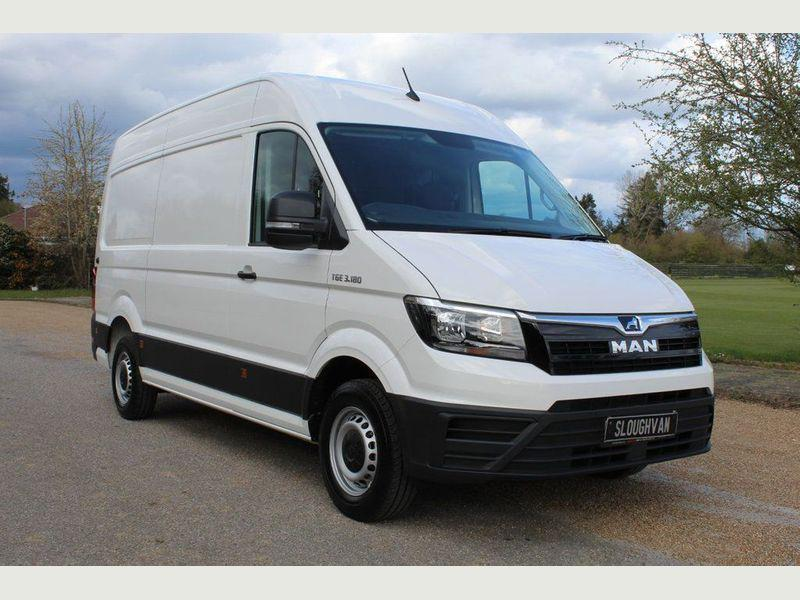

In [21]:
img

In [22]:
class_names = ["sedan","pickup","suv","coupe","van"]

In [23]:
preds = zsic(image = img,
            candidate_labels = class_names,
            hypothesis_template="A photo of {}",
            )

In [24]:
preds['labels'][preds['scores'].index(max(preds['scores']))]

'van'